# Standarization or mean removal or variance scaling

>**Centerization of data is called Standarization.**

In [1]:
from sklearn.preprocessing import StandardScaler
data = [
    [1,2,3],
    [0,5,8],
    [2,7,3],
    [0,0,5]
]

scaler = StandardScaler()

In [2]:
scaler.fit(data)

StandardScaler()

In [3]:
scaler.mean_

array([0.75, 3.5 , 4.75])

In [4]:
new_transform_data =scaler.transform(data)
new_transform_data

array([[ 0.30151134, -0.55708601, -0.85518611],
       [-0.90453403,  0.55708601,  1.58820278],
       [ 1.50755672,  1.29986737, -0.85518611],
       [-0.90453403, -1.29986737,  0.12216944]])

**Normalized Data Vs Standardized Data**


* Normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution.
* Normalization scales in a range of [0,1] or [-1,1]. Standardization is not bounded by range.
* Normalization is highly affected by outliers. Standardization is slightly affected by outliers.
* Normalization is considered when the algorithms do not make assumptions about the data distribution. Standardization is used when algorithms make assumptions about the data distribution.

In [5]:
scaler.transform([[1,2,3]])

array([[ 0.30151134, -0.55708601, -0.85518611]])

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data0

pipe.score(X_test, y_test)

0.96

>**Scaling Features within 0 to 1 using MinMaxScaler()**


>**Scaling Features within -1 to +1 using MaxAbsScaler()**

In [7]:
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
x_train = [
    [10,20,50,-100,70],
    [120,210,-450,10,80],
    [10,20,50,110,-80],
]

In [8]:
MinMaxScaler().fit_transform(x_train)

array([[0.        , 0.        , 1.        , 0.        , 0.9375    ],
       [1.        , 1.        , 0.        , 0.52380952, 1.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ]])

In [9]:
MaxAbsScaler().fit_transform(x_train)

array([[ 0.08333333,  0.0952381 ,  0.11111111, -0.90909091,  0.875     ],
       [ 1.        ,  1.        , -1.        ,  0.09090909,  1.        ],
       [ 0.08333333,  0.0952381 ,  0.11111111,  1.        , -1.        ]])

### Scaling Sparse Matrix with CSR and CSC

[Must Watch](https://youtu.be/dfMoygb7FZE)

In [10]:
X_train = [
    [1,0,0],
    [0,5,6],
    [7,0,0]
]

In [11]:
from scipy import sparse

In [12]:
print(sparse.csr_matrix(X_train)) #Compresed Sparced Row Matrix

  (0, 0)	1
  (1, 1)	5
  (1, 2)	6
  (2, 0)	7


In [13]:
print(sparse.csc_matrix(X_train)) #Compresed Soarced Column Matrix

  (0, 0)	1
  (2, 0)	7
  (1, 1)	5
  (1, 2)	6


In [14]:
MaxAbsScaler().fit_transform(X_train)

array([[0.14285714, 0.        , 0.        ],
       [0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.        ]])

In [15]:
MinMaxScaler().fit_transform(X_train)

array([[0.14285714, 0.        , 0.        ],
       [0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.        ]])

In [16]:
StandardScaler().fit_transform(X_train)

array([[-0.53916387, -0.70710678, -0.70710678],
       [-0.86266219,  1.41421356,  1.41421356],
       [ 1.40182605, -0.70710678, -0.70710678]])

In [17]:
StandardScaler(with_mean=False).fit_transform(X_train) #For standard scaler we have to use with_mean = False

array([[0.32349832, 0.        , 0.        ],
       [0.        , 2.12132034, 2.12132034],
       [2.26448824, 0.        , 0.        ]])

In [18]:
#Passing CSR format in MaxAbsScaler()
max_abs_scaling_in_csr_format = MaxAbsScaler().fit_transform(sparse.csr_matrix(X_train))
print(max_abs_scaling_in_csr_format)

  (0, 0)	0.14285714285714285
  (1, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0


In [19]:
#Passing CSC format in MaxAbsScaler()
max_abs_scaling_in_csc_format = MaxAbsScaler().fit_transform(sparse.csc_matrix(X_train))
print(max_abs_scaling_in_csc_format)

  (0, 0)	0.14285714285714285
  (2, 0)	1.0
  (1, 1)	1.0
  (1, 2)	1.0


In [20]:
standard_scaler_in_csr_format = StandardScaler(with_mean=False).fit_transform(sparse.csr_matrix(X_train))
print(standard_scaler_in_csr_format)

  (0, 0)	0.3234983196103152
  (1, 1)	2.121320343559643
  (1, 2)	2.1213203435596424
  (2, 0)	2.2644882372722064


In [21]:
standard_scaler_in_csc_format = StandardScaler(with_mean=False).fit_transform(sparse.csc_matrix(X_train))
print(standard_scaler_in_csc_format)

  (0, 0)	0.3234983196103152
  (1, 1)	2.121320343559643
  (1, 2)	2.1213203435596424
  (2, 0)	2.2644882372722064


### Scaling with outliers `RobustScaler`
[Must Watch](https://www.youtube.com/watch?v=1lCWNcR4iW0)

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

In [23]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

In [24]:
X = df.iloc[:,[2,4]]
y = df.iloc[:,[5]]

In [25]:
X.head()

displacement  weight
0         307.0    3504
1         350.0    3693
2         318.0    3436
3         304.0    3433
4         302.0    3449

In [26]:
y.head()

acceleration
0          12.0
1          11.5
2          11.0
3          12.0
4          10.5

In [27]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

In [29]:
X_train.head()

displacement  weight
370         112.0    2575
159         351.0    4657
161         250.0    3897
339         151.0    2635
107         232.0    2789

In [30]:
robust_scaler = RobustScaler()

In [31]:
robust_scaler

RobustScaler()

In [32]:
robust_scaler.fit(X_train)

RobustScaler()

In [33]:
robust_scaler.n_features_in_

2

In [34]:
X_train_robust_scaled = robust_scaler.transform(X_train)

In [35]:
X_test_robust_scaled = RobustScaler().fit(X_test).transform(X_test)

In [36]:
X_test_robust_scaled

array([[-0.3238342 , -0.6171875 ],
       [ 0.37046632,  0.45721726],
       [-0.29274611, -0.51674107],
       [-0.28756477, -0.42373512],
       [-0.22020725, -0.49813988],
       [ 0.24093264,  0.0375744 ],
       [-0.09585492, -0.33816964],
       [-0.20984456, -0.4438244 ],
       [-0.34974093, -0.59933036],
       [-0.2357513 , -0.32254464],
       [ 0.85233161,  1.01599702],
       [-0.06994819, -0.05171131],
       [-0.3238342 , -0.76599702],
       [ 0.5       ,  0.51748512],
       [ 0.40673575,  0.34486607],
       [ 0.76943005,  0.77790179],
       [ 0.01295337, -0.1781994 ],
       [ 0.56217617,  0.14174107],
       [-0.25129534, -0.44233631],
       [-0.29274611, -0.56510417],
       [-0.10103627, -0.23028274],
       [ 0.54145078,  0.27418155],
       [ 1.27720207,  1.16108631],
       [ 0.96632124,  0.58370536],
       [-0.2253886 , -0.11346726],
       [ 1.01813472,  1.39471726],
       [ 0.5       ,  0.14620536],
       [-0.35492228, -0.5874256 ],
       [-0.01295337,

### Uniform Distribution

[Must Watch](https://youtu.be/RwGmdFFG1QA)

[Intuition for Quantile Transform](https://youtu.be/ByjPLoxQAZk)

In [37]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

In [38]:
rng = np.random.RandomState(0)
X = rng.normal(loc=0.5, scale=0.25, size=(25, 1)) #loc is center and scale is Gaussian Distribution

In [39]:
qt = QuantileTransformer(n_quantiles=10,random_state=0)

In [40]:
quantiled_X = qt.fit_transform(X)

In [41]:
print("X\t\tquantiled_X\tdiff")
for i in range(len(X)):
    print(X[i],quantiled_X[i],X[i]-quantiled_X[i])

X		quantiled_X	diff
[0.94101309] [0.88126439] [0.0597487]
[0.6000393] [0.46257841] [0.13746089]
[0.7446845] [0.69611125] [0.04857325]
[1.0602233] [0.99319435] [0.06702895]
[0.9668895] [0.90516028] [0.06172922]
[0.25568053] [0.09871873] [0.1569618]
[0.7375221] [0.68873101] [0.04879109]
[0.4621607] [0.21945445] [0.24270625]
[0.47419529] [0.23498666] [0.23920863]
[0.60264963] [0.47112236] [0.13152726]
[0.53601089] [0.33333333] [0.20267756]
[0.86356838] [0.81280699] [0.05076139]
[0.69025943] [0.63390302] [0.05635641]
[0.53041875] [0.32443642] [0.20598234]
[0.61096581] [0.49834237] [0.11262344]
[0.58341858] [0.42339464] [0.16002394]
[0.87351977] [0.82160354] [0.05191623]
[0.44871043] [0.21017437] [0.23853607]
[0.57826693] [0.41360794] [0.16465899]
[0.28647607] [0.10643612] [0.18003994]
[-0.13824745] [0.] [-0.13824745]
[0.66340465] [0.59986536] [0.06353928]
[0.71610905] [0.66666667] [0.04944238]
[0.31445874] [0.11754671] [0.19691203]
[1.06743866] [1.] [0.06743866]


In [42]:
qt.get_feature_names_out

<bound method _OneToOneFeatureMixin.get_feature_names_out of QuantileTransformer(n_quantiles=10, random_state=0)>

In [43]:
qt.get_params

<bound method BaseEstimator.get_params of QuantileTransformer(n_quantiles=10, random_state=0)>

### Mapping to a Uniform distribution

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [45]:
X,y = load_iris(return_X_y=True)

In [46]:
X[:5],y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
qt = preprocessing.QuantileTransformer(random_state=0)
X_train_qt = qt.fit_transform(X_train)
X_test_qt = qt.fit_transform(X_test)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (38). n_quantiles is set to n_samples.
  warnings.warn(


In [48]:
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [49]:
np.percentile(X_train_qt[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

### Power Transform

[Intuition](https://youtu.be/xvPBLB-W554)

>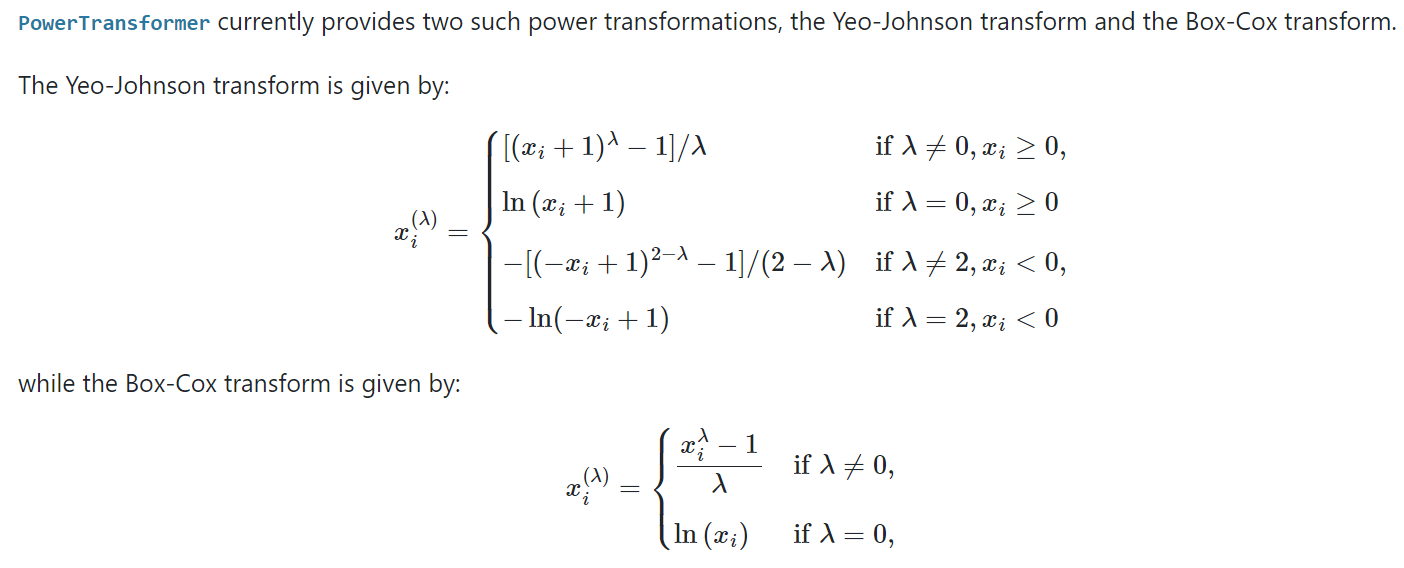

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

>#### Log Normal Data

(array([722., 170.,  53.,  19.,  17.,   6.,   8.,   2.,   1.,   2.]),
 array([  2.59570186,  88.5447386 , 174.49377534, 260.44281208,
        346.39184882, 432.34088556, 518.28992231, 604.23895905,
        690.18799579, 776.13703253, 862.08606927]),
 <BarContainer object of 10 artists>)

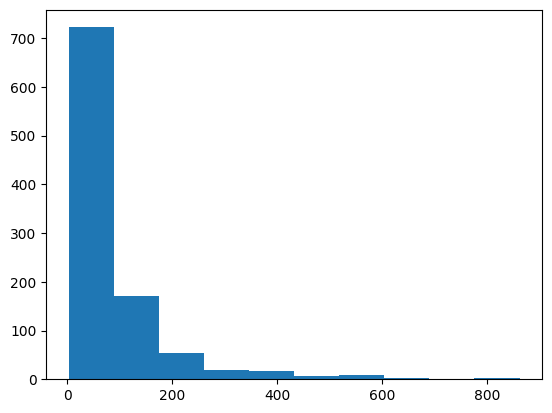

In [51]:
# Original data

np.random.seed(0)
logn = np.random.lognormal(mean=4.0,sigma=1.0,size=1000)
plt.hist(logn)

In [52]:
# Transformed Data
yeo_jhonson = []
box_cox = []
lambda1 = 0.09
lambda2 = 0.04

for xi in logn:
    yeo_jhonson.append(((xi+1)**lambda1)/lambda1)
    box_cox.append(((xi**lambda2)-1)/lambda2)

(array([ 18.,  55., 140., 222., 223., 167.,  97.,  44.,  25.,   9.]),
 array([12.46746108, 13.26246402, 14.05746695, 14.85246988, 15.64747281,
        16.44247574, 17.23747868, 18.03248161, 18.82748454, 19.62248747,
        20.41749041]),
 <BarContainer object of 10 artists>)

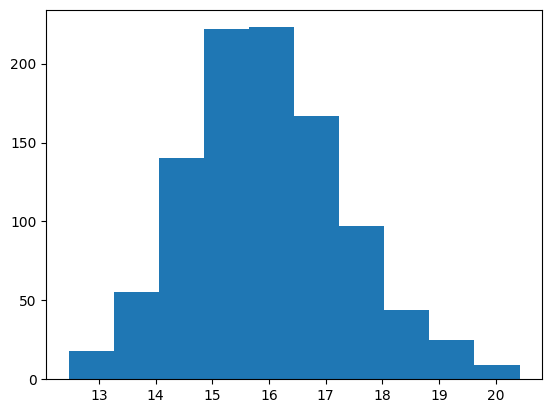

In [53]:
plt.hist(yeo_jhonson)

(array([  9.,  28.,  90., 170., 241., 210., 144.,  62.,  32.,  14.]),
 array([0.97228746, 1.65119556, 2.33010365, 3.00901175, 3.68791985,
        4.36682794, 5.04573604, 5.72464414, 6.40355223, 7.08246033,
        7.76136843]),
 <BarContainer object of 10 artists>)

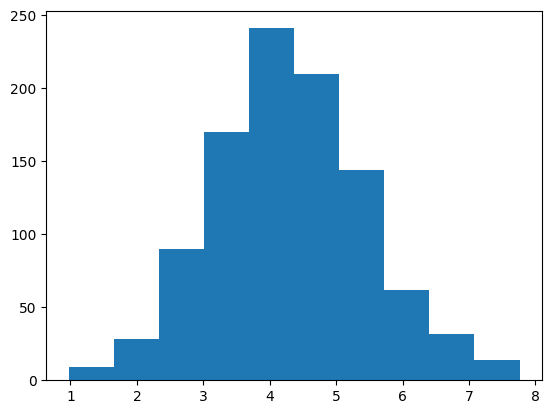

In [54]:
plt.hist(box_cox)

In [55]:
def plothis(a, atitle, b, c):
    fig = plt.figure(figsize=(15,4))

    plt.subplot (1,3, 1)
    plt.hist(a)
    plt.title(atitle)

    plt.subplot (1, 3,2)
    plt.hist(b)
    plt.title("Yeo-Johnson")

    plt.subplot (1,3,3)
    plt.hist(c)
    plt.title("Box-cox")

    plt.tight_layout()
    plt.show()

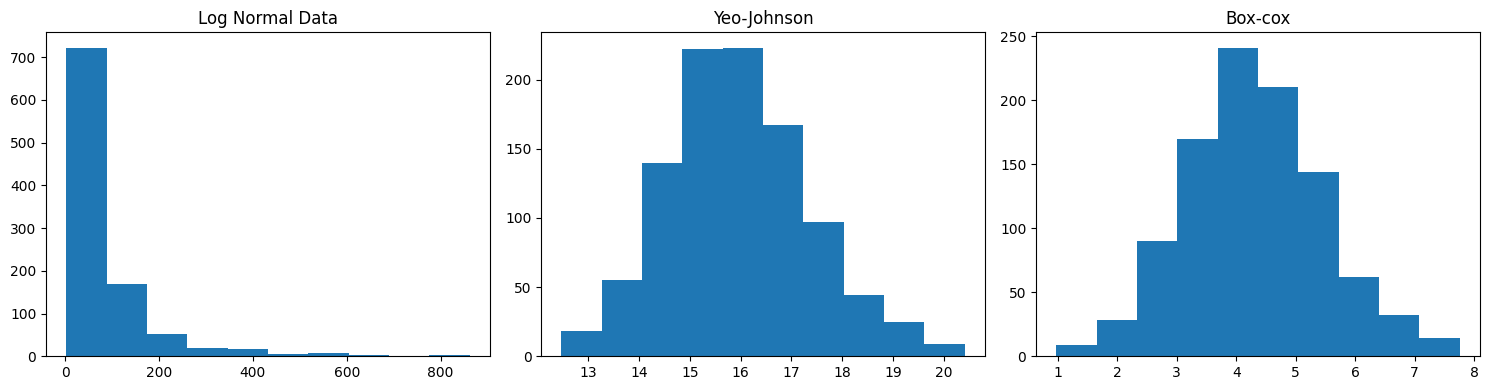

In [56]:
plothis(logn,"Log Normal Data",yeo_jhonson,box_cox)

In [57]:
preprocessing.PowerTransformer(method='yeo-johnson',standardize=True).fit_transform(logn.reshape(1000,1))

array([[ 1.81410865e+00],
       [ 4.62006240e-01],
       [ 1.04318404e+00],
       [ 2.27143448e+00],
       [ 1.91408200e+00],
       [-9.52801900e-01],
       [ 1.01465710e+00],
       [-1.00745251e-01],
       [-5.13457803e-02],
       [ 4.72584411e-01],
       [ 2.01602587e-01],
       [ 1.51259669e+00],
       [ 8.25740260e-01],
       [ 1.78778374e-01],
       [ 5.06264444e-01],
       [ 3.94579869e-01],
       [ 1.55153196e+00],
       [-1.56008858e-01],
       [ 3.73655916e-01],
       [-8.25523183e-01],
       [-2.52684887e+00],
       [ 7.17886875e-01],
       [ 9.29209724e-01],
       [-7.09835873e-01],
       [ 2.29884796e+00],
       [-1.44371923e+00],
       [ 1.01225108e-01],
       [-1.37539782e-01],
       [ 1.58933200e+00],
       [ 1.52735874e+00],
       [ 2.12724061e-01],
       [ 4.39713117e-01],
       [-8.60340658e-01],
       [-1.97532956e+00],
       [-3.02889140e-01],
       [ 2.14153361e-01],
       [ 1.29247080e+00],
       [ 1.26491804e+00],
       [-3.4

In [58]:
preprocessing.PowerTransformer(method='box-cox',standardize=True).fit_transform(logn.reshape(1000,1))

array([[ 1.81982652e+00],
       [ 4.55887647e-01],
       [ 1.03713352e+00],
       [ 2.29159509e+00],
       [ 1.92245385e+00],
       [-9.43753557e-01],
       [ 1.00844404e+00],
       [-1.01824579e-01],
       [-5.30024609e-02],
       [ 4.66411771e-01],
       [ 1.97341255e-01],
       [ 1.51193625e+00],
       [ 8.18889866e-01],
       [ 1.74723594e-01],
       [ 4.99931857e-01],
       [ 3.88847344e-01],
       [ 1.55156135e+00],
       [-1.56422225e-01],
       [ 3.68057405e-01],
       [-8.17669512e-01],
       [-2.57264066e+00],
       [ 7.10998598e-01],
       [ 9.22615412e-01],
       [-7.03258670e-01],
       [ 2.32006552e+00],
       [-1.43379072e+00],
       [ 9.79177126e-02],
       [-1.38177873e-01],
       [ 1.59006844e+00],
       [ 1.52695528e+00],
       [ 2.08364404e-01],
       [ 4.33714290e-01],
       [-8.52135219e-01],
       [-1.97767882e+00],
       [-3.01455649e-01],
       [ 2.09781180e-01],
       [ 1.28862609e+00],
       [ 1.26075825e+00],
       [-3.4

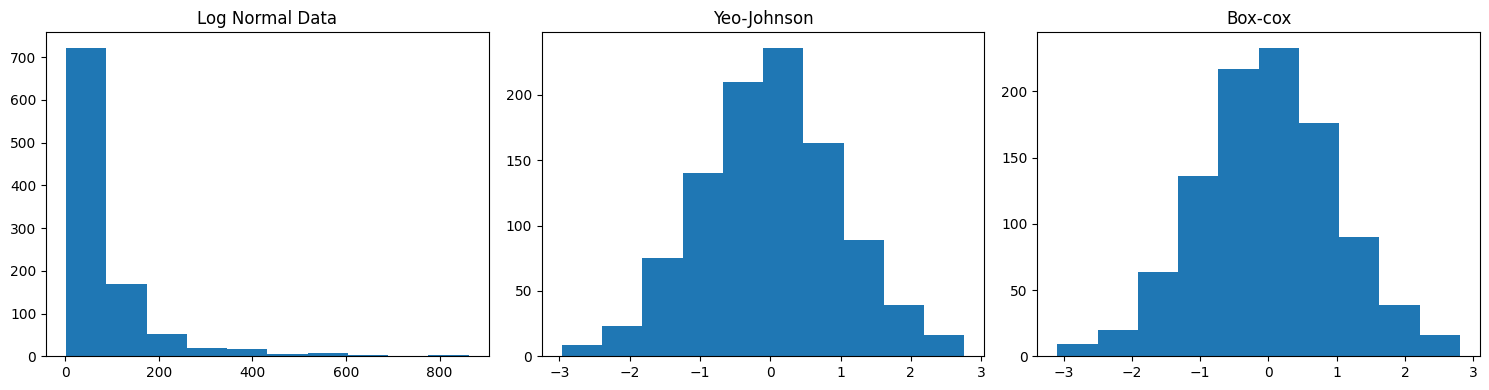

In [59]:
plothis(
    logn,"Log Normal Data",
    preprocessing.PowerTransformer(method='yeo-johnson',standardize=True).fit_transform(logn.reshape(1000,1)),
    preprocessing.PowerTransformer(method='box-cox',standardize=True).fit_transform(logn.reshape(1000,1))
)

>#### Chisquare Data

In [60]:
def getValues(x,l1,l2):
    yeo_jhonson = []
    box_cox = []
    lambda1 = 0.09
    lambda2 = 0.04

    for xi in x:
        yeo_jhonson.append(((xi+1)**lambda1)/lambda1)
        box_cox.append(((xi**lambda2)-1)/lambda2)
    
    return yeo_jhonson,box_cox

In [61]:
np.random.seed(0)
data = np.random.chisquare(df=4.0,size=1000)

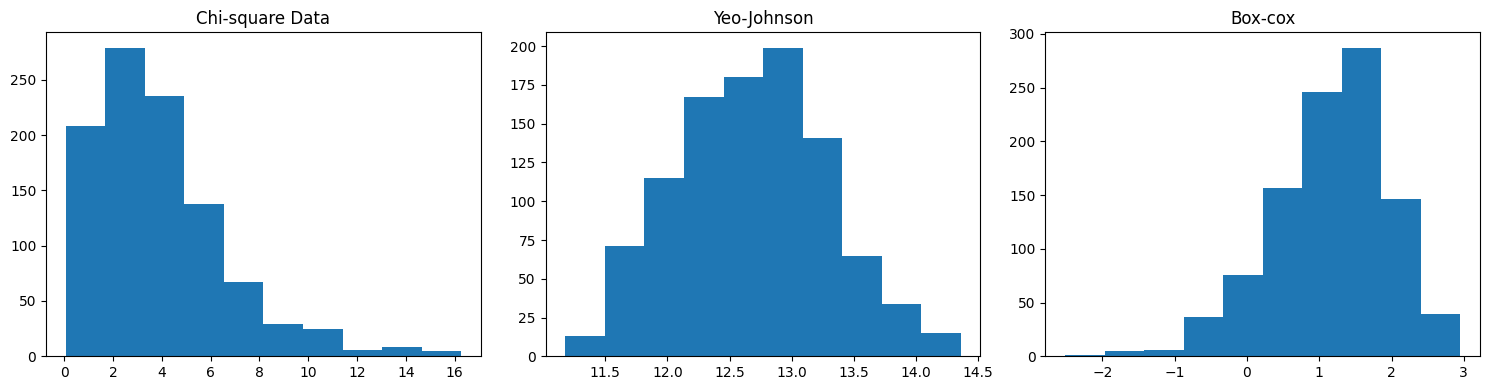

In [62]:
t1,t2 = getValues(data,-0.05,0.05)
plothis(data,"Chi-square Data",t1,t2)

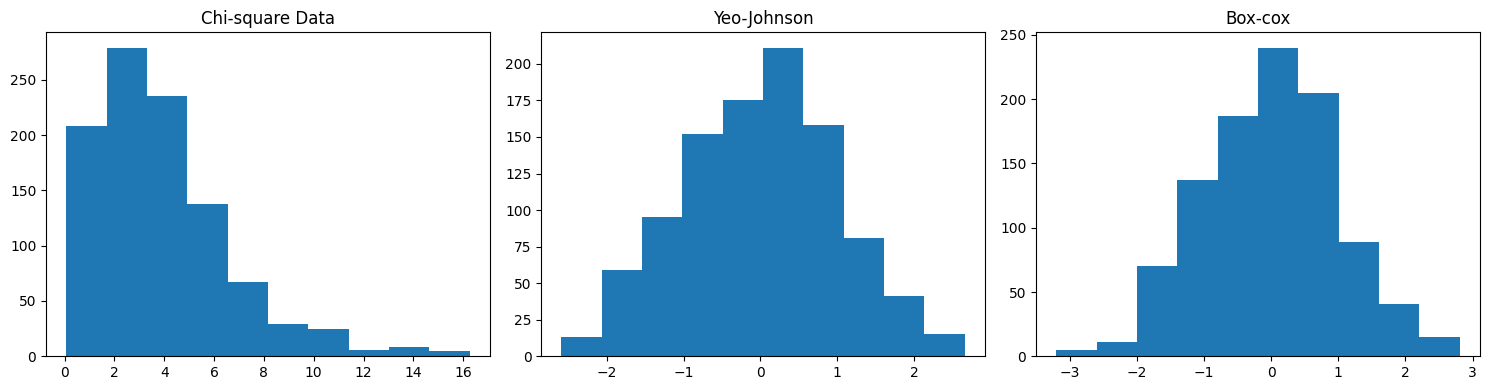

In [63]:
plothis(
    data,"Chi-square Data",
    preprocessing.PowerTransformer(method='yeo-johnson',standardize=True).fit_transform(data.reshape(1000,1)),
    preprocessing.PowerTransformer(method='box-cox',standardize=True).fit_transform(data.reshape(1000,1))
)

>#### Weibull

In [64]:
np.random.seed(0)
wei = np.random.weibull(a=10,size=1000)

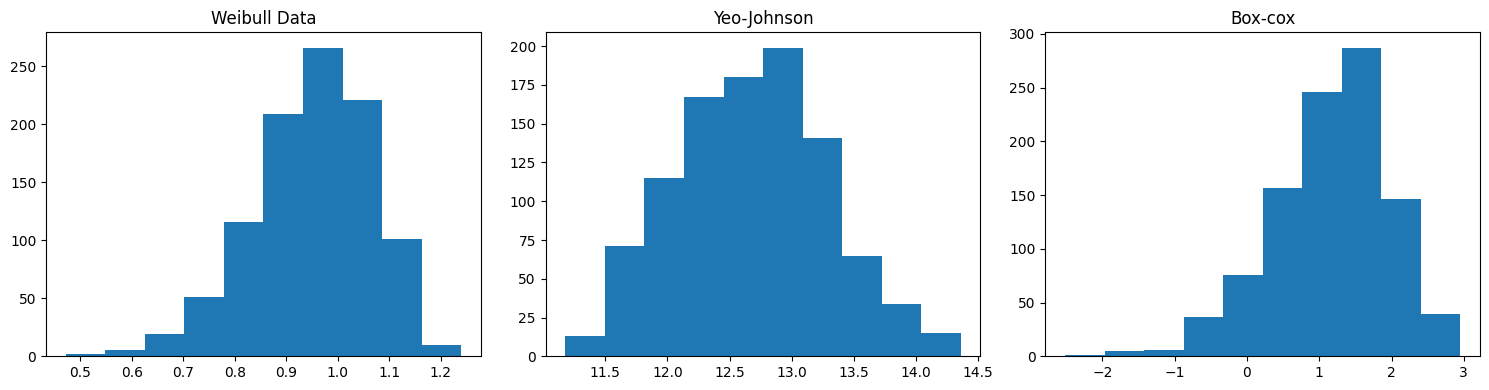

In [65]:
t1,t2 = getValues(data,3.0,2.3)
plothis(wei,"Weibull Data",t1,t2)

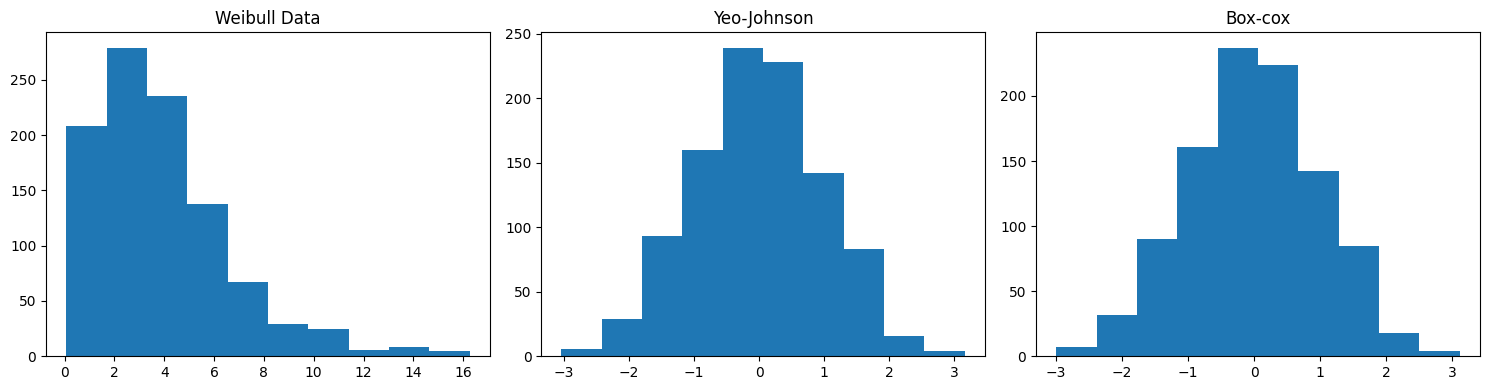

In [66]:
plothis(
    data,"Weibull Data",
    preprocessing.PowerTransformer(method='yeo-johnson',standardize=True).fit_transform(wei.reshape(1000,1)),
    preprocessing.PowerTransformer(method='box-cox',standardize=True).fit_transform(wei.reshape(1000,1))
)

In [67]:
#Don't need to understand this code

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(output_distribution="normal").fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [68]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

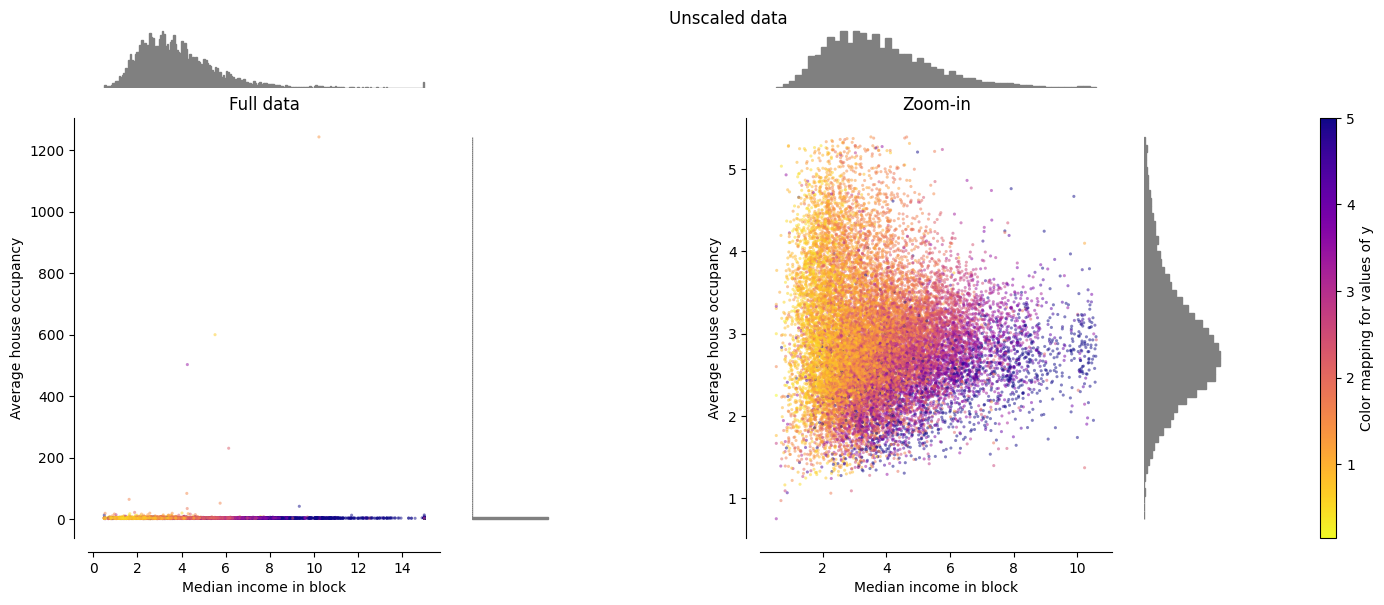

In [69]:
make_plot(0)

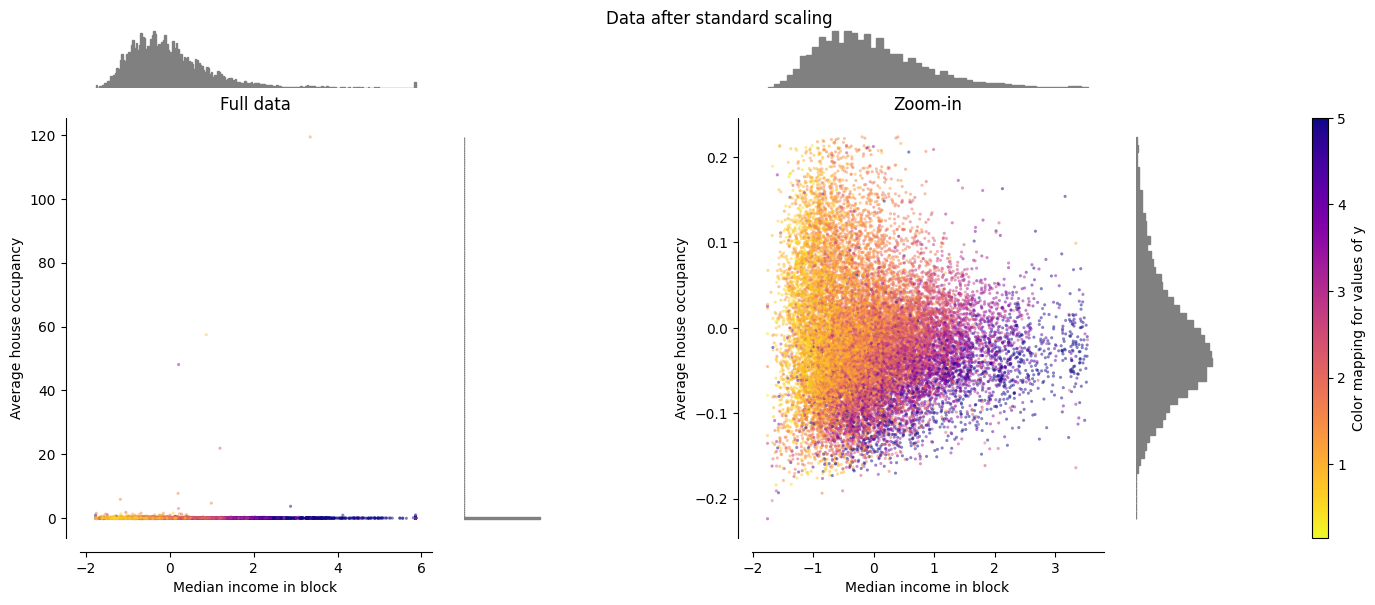

In [70]:
make_plot(1)

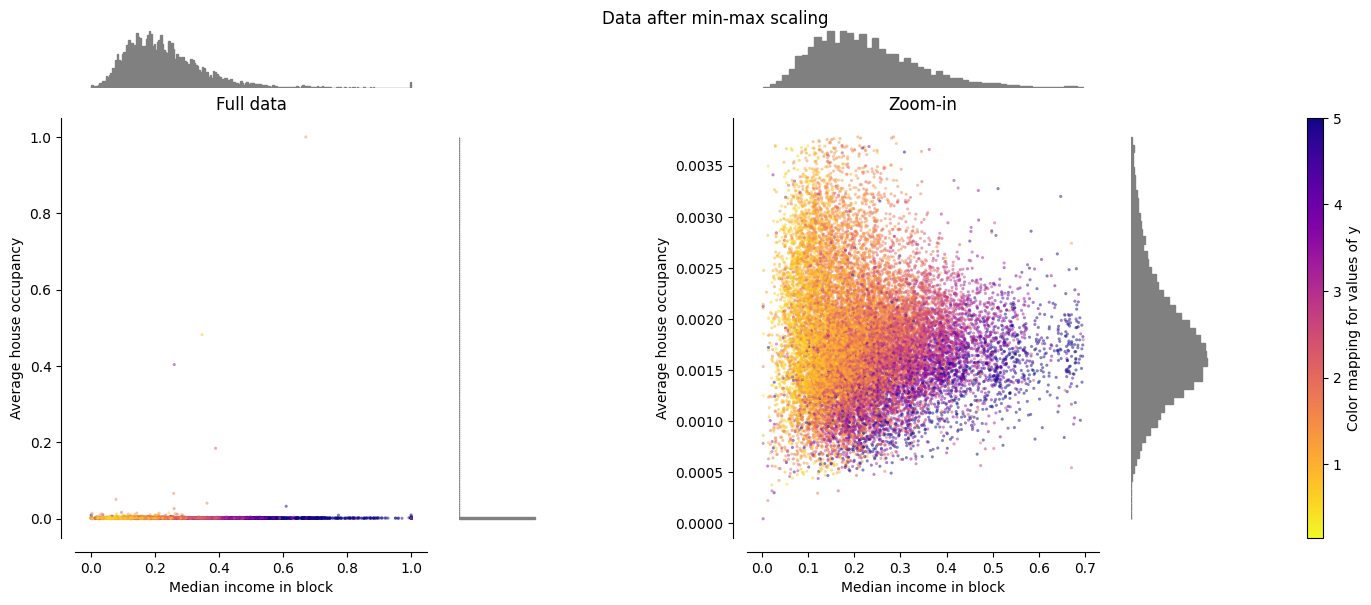

In [71]:
make_plot(2)

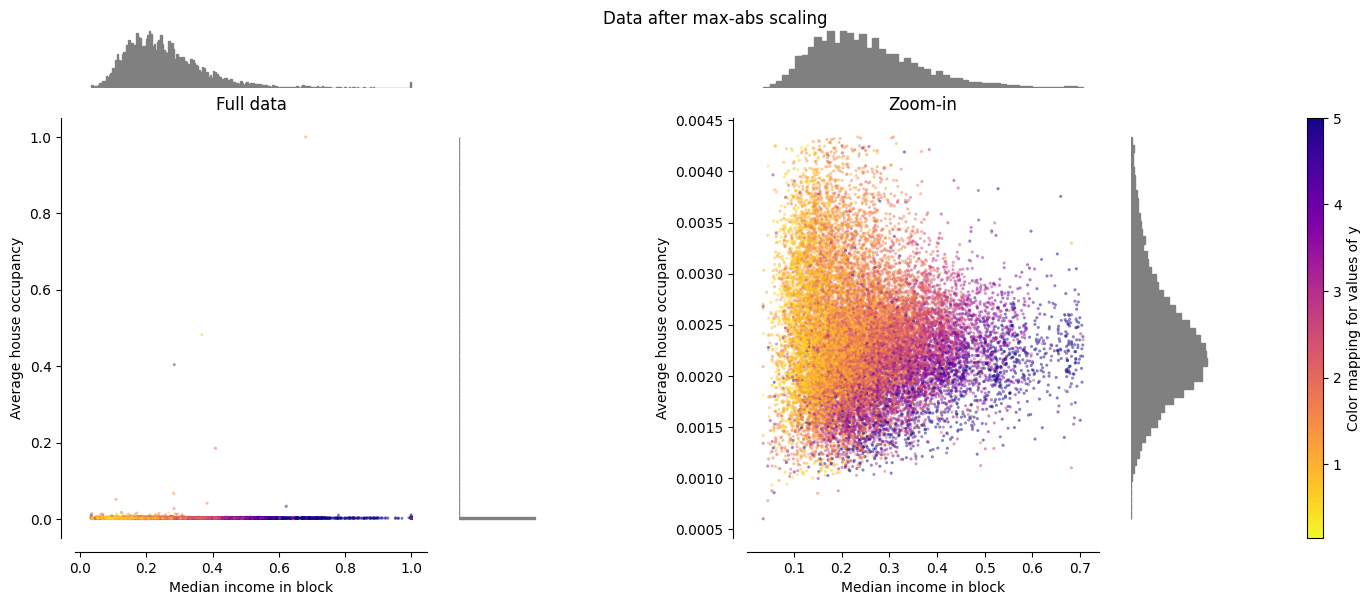

In [72]:
make_plot(3)

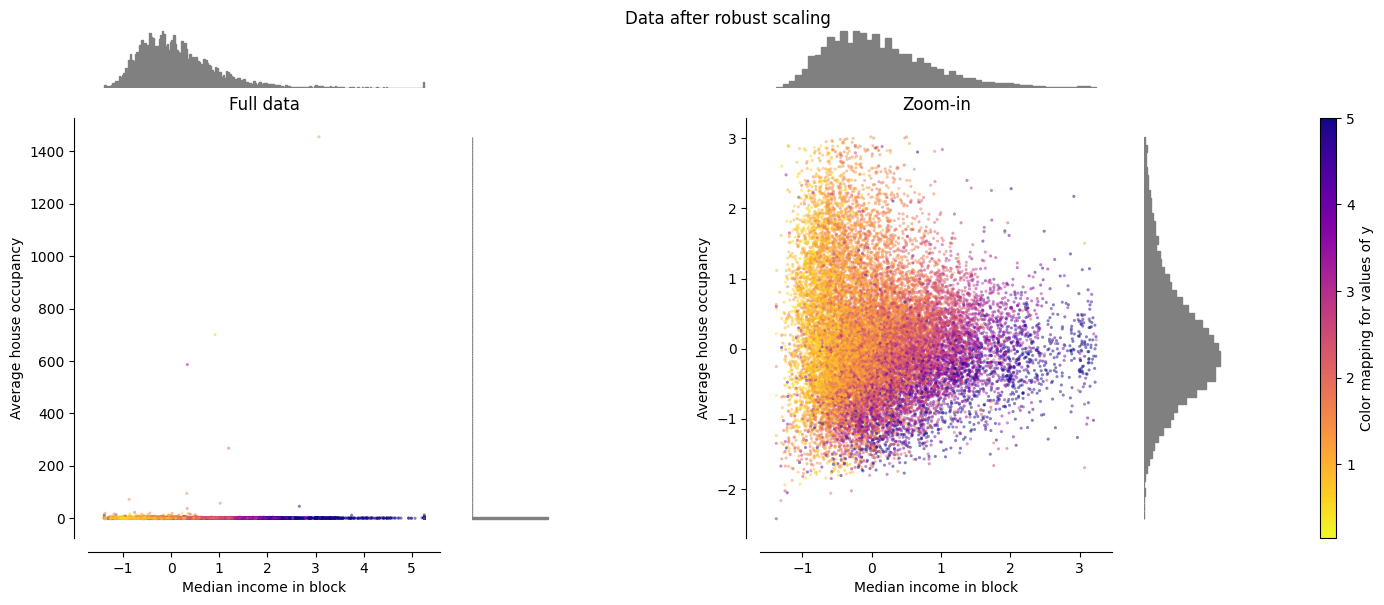

In [73]:
make_plot(4)

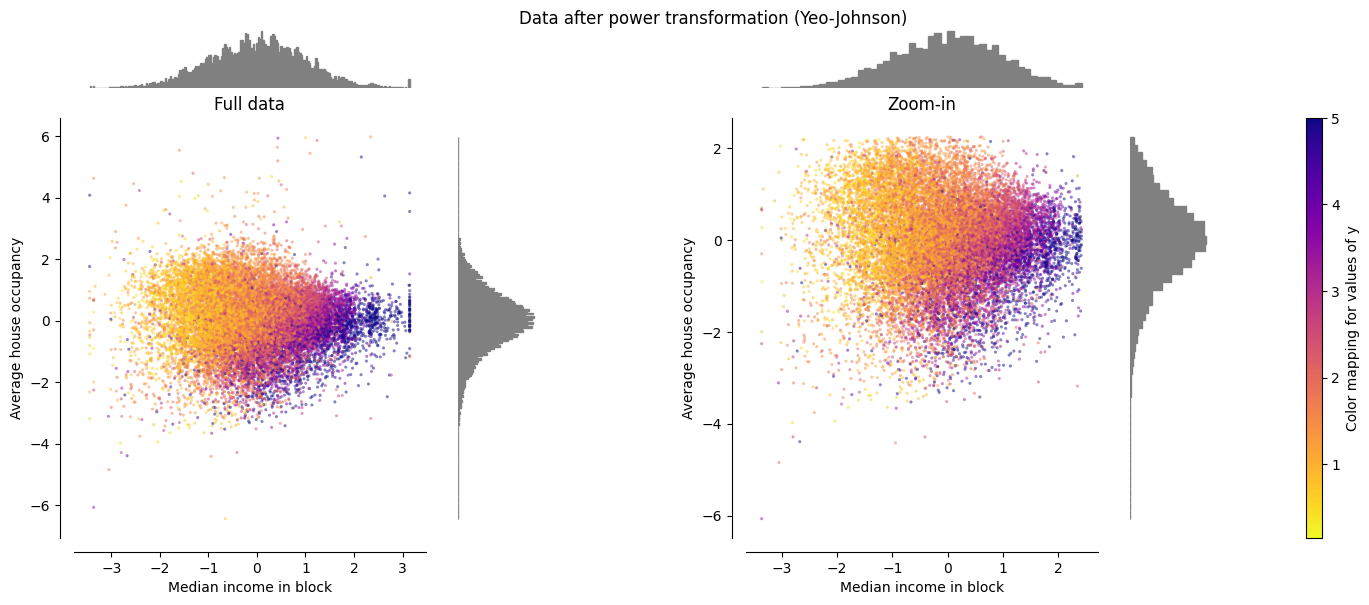

In [74]:
make_plot(5)

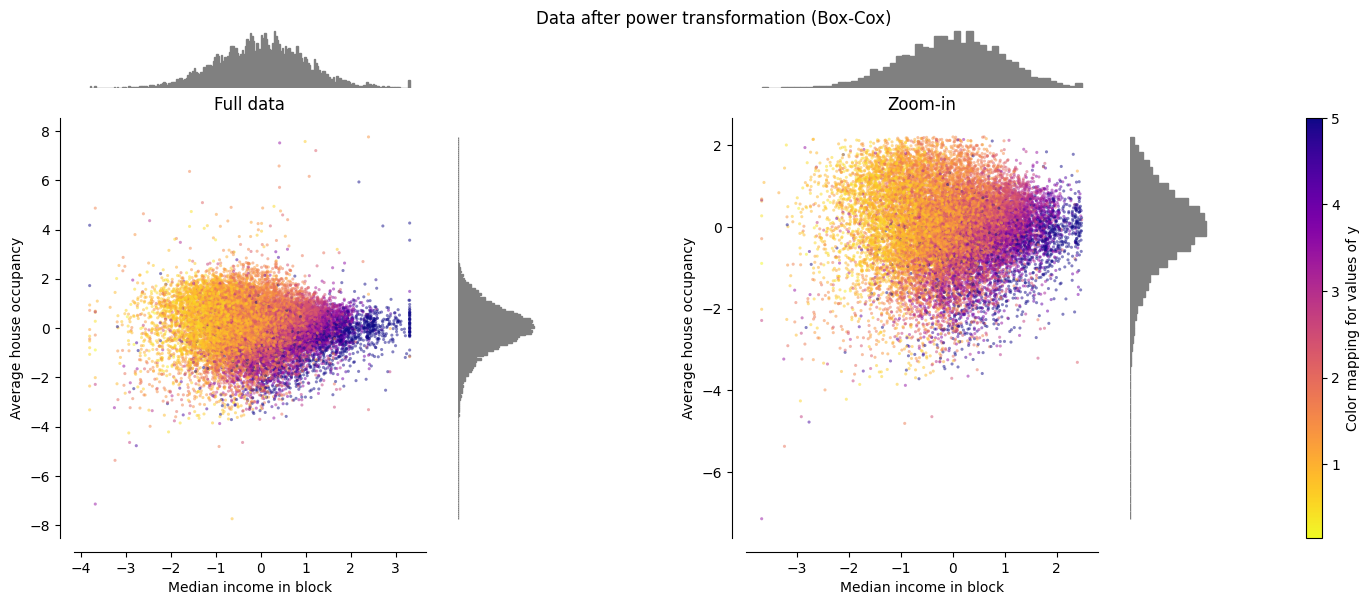

In [75]:
make_plot(6)

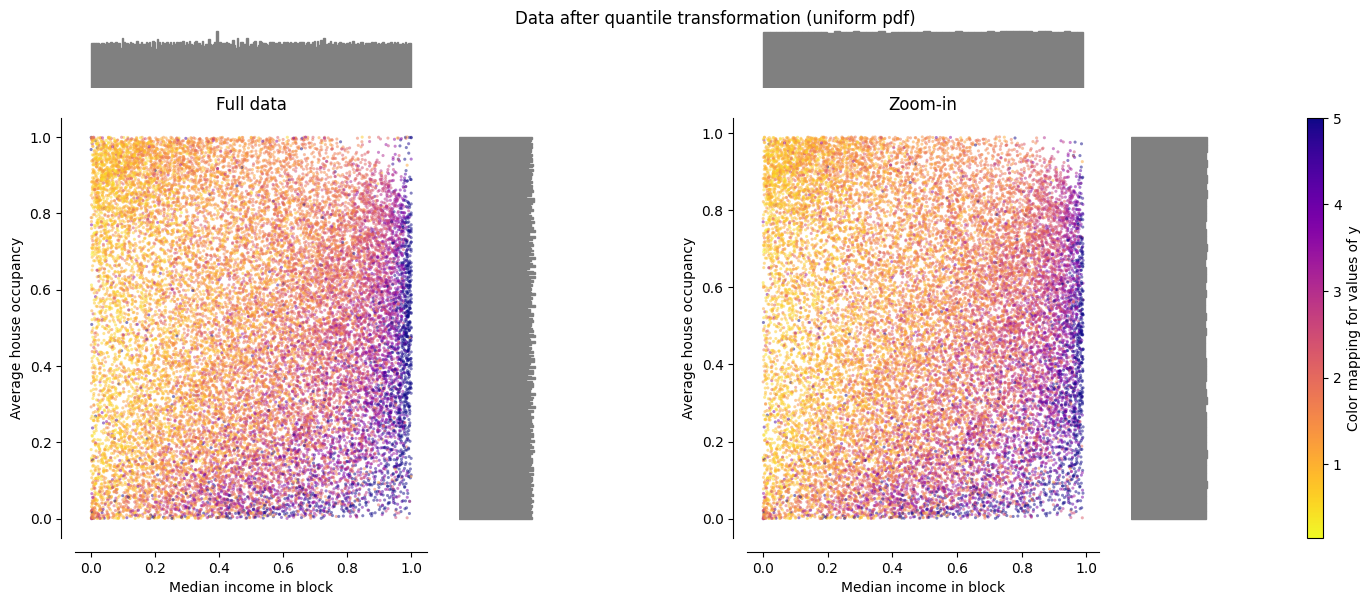

In [76]:
make_plot(7)

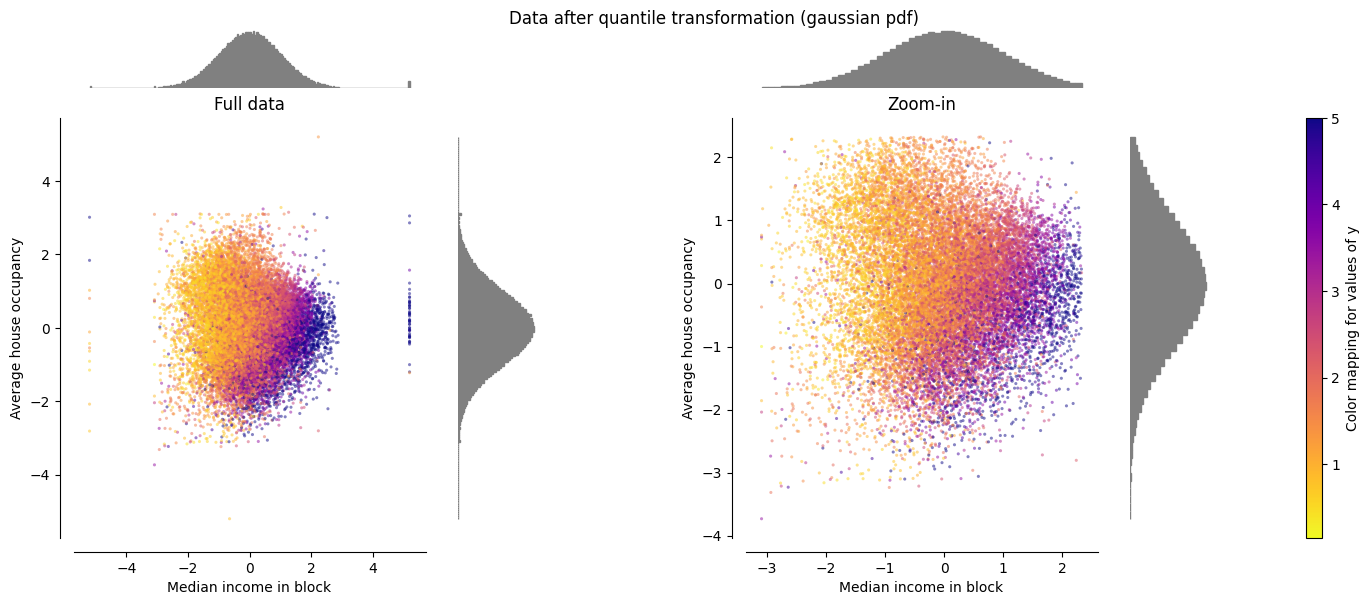

In [77]:
make_plot(8)

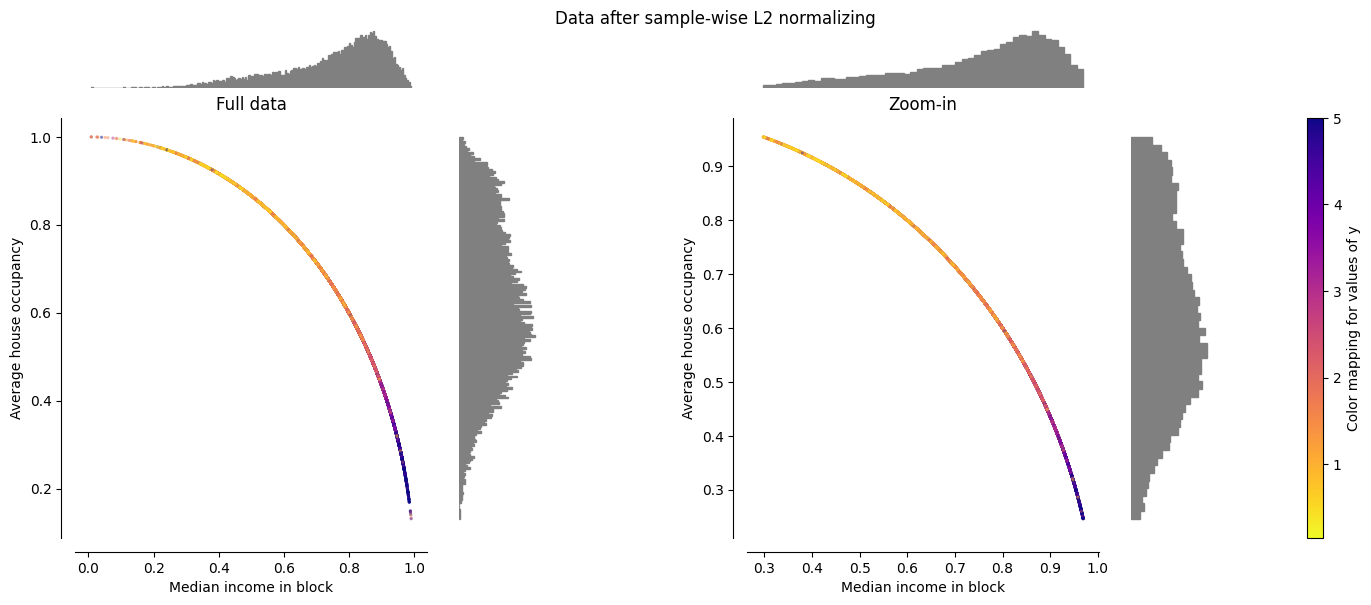

In [78]:
make_plot(9)

### KBinsDiscretizer()

In [79]:
import numpy as np
from sklearn import preprocessing

In [80]:
X = [
    [1,2,3,4],
    [-1,-2,-3,-4],
    [4,3,2,1],
    [0,1,0,1]
]

In [81]:
# We dividing data into n_bins and final output is showing that which data point is under which bins

est = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit(X)
est.transform(X)

array([[1., 2., 2., 2.],
       [0., 0., 0., 0.],
       [2., 2., 2., 1.],
       [0., 1., 1., 1.]])

In [82]:
est = preprocessing.KBinsDiscretizer(n_bins=2,encode='ordinal',strategy='uniform')
est.fit(X)
est.transform(X)

array([[0., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 1., 1., 1.]])

In [83]:
est = preprocessing.KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')
est.fit(X)
est.transform(X).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]])

In [84]:
est = preprocessing.KBinsDiscretizer(n_bins=3,encode='onehot-dense',strategy='uniform')
est.fit(X)
est.transform(X)

array([[0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]])

In [85]:
est = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
est.fit(X)
est.transform(X)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([[2., 2., 2., 1.],
       [0., 0., 0., 0.],
       [2., 2., 2., 1.],
       [1., 1., 1., 1.]])

### `LabelBinarizer()`

In [86]:
from sklearn.preprocessing import LabelBinarizer

In [87]:
lb = LabelBinarizer(neg_label=False,pos_label=True,sparse_output=False)

In [88]:
lb

LabelBinarizer(neg_label=False, pos_label=True)

In [89]:
lb.fit([-1,-3,-5,0,2,4,6,8])

LabelBinarizer(neg_label=False, pos_label=True)

In [90]:
lb.classes_

array([-5, -3, -1,  0,  2,  4,  6,  8])

In [91]:
lb.transform([2,3])

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [92]:
lb.transform([-3,8])

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])